In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/stock_data.csv')

In [ ]:
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
         Date Symbol    Open      High     Low   Close    Volume
0  2023-10-27   AAPL  166.91  168.9600  166.83  168.22  58499129
1  2023-10-26   AAPL  170.37  171.3775  165.67  166.89  70625258
2  2023-10-25   AAPL  171.88  173.0600  170.65  171.10  57156962
3  2023-10-24   AAPL  173.05  173.6700  171.45  173.44  43816644
4  2023-10-23   AAPL  170.91  174.0100  169.93  173.00  55980109


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Date      0
Symbol    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [ ]:
# Print unique symbols
print("\nUnique Symbols:")
print(df['Symbol'].unique())


Unique Symbols:
['AAPL' 'TSLA' 'AMD' 'NVDA']


In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract only the date part from the datetime
df['Date'] = df['Date'].dt.date

# Display the modified DataFrame
print(df)


             Date Symbol    Open      High     Low   Close    Volume
0      2023-10-27   AAPL  166.91  168.9600  166.83  168.22  58499129
1      2023-10-26   AAPL  170.37  171.3775  165.67  166.89  70625258
2      2023-10-25   AAPL  171.88  173.0600  170.65  171.10  57156962
3      2023-10-24   AAPL  173.05  173.6700  171.45  173.44  43816644
4      2023-10-23   AAPL  170.91  174.0100  169.93  173.00  55980109
...           ...    ...     ...       ...     ...     ...       ...
21463  1999-11-05   NVDA   30.00   30.2500   26.88   28.25   1284100
21464  1999-11-04   NVDA   27.75   29.9400   27.75   29.19   2625700
21465  1999-11-03   NVDA   26.00   28.1300   25.81   27.44   4191000
21466  1999-11-02   NVDA   23.94   25.1300   23.75   25.00   1744800
21467  1999-11-01   NVDA   21.75   24.3800   21.75   23.50   1630300

[21468 rows x 7 columns]


In [ ]:
# convert the string '2020-01-01' to a datetime object
start_date = pd.to_datetime('2018-01-01')

# convert the string '2023-01-01' to a datetime object
end_date = pd.to_datetime('2023-10-30')

# filter data from start_date to end_date
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# print filtered data
print(df_filtered)

<ipython-input-9-21cece5a639f>:8: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


             Date Symbol    Open      High     Low   Close    Volume
0      2023-10-27   AAPL  166.91  168.9600  166.83  168.22  58499129
1      2023-10-26   AAPL  170.37  171.3775  165.67  166.89  70625258
2      2023-10-25   AAPL  171.88  173.0600  170.65  171.10  57156962
3      2023-10-24   AAPL  173.05  173.6700  171.45  173.44  43816644
4      2023-10-23   AAPL  170.91  174.0100  169.93  173.00  55980109
...           ...    ...     ...       ...     ...     ...       ...
16892  2018-01-08   NVDA  220.40  225.0000  218.58  222.00  21190932
16893  2018-01-05   NVDA  214.19  216.9100  211.08  215.40  14008768
16894  2018-01-04   NVDA  215.76  218.0500  212.69  213.59  14346675
16895  2018-01-03   NVDA  204.10  213.7000  203.75  212.47  22499518
16896  2018-01-02   NVDA  195.78  199.5000  194.50  199.35   8303752

[5864 rows x 7 columns]


In [ ]:
df_filtered.count()

Date      5864
Symbol    5864
Open      5864
High      5864
Low       5864
Close     5864
Volume    5864
dtype: int64

In [ ]:
print("\nSummary statistics of the data:")
print(df_filtered.describe())


Summary statistics of the data:
              Open         High          Low        Close        Volume
count  5864.000000  5864.000000  5864.000000  5864.000000  5.864000e+03
mean    264.410500   269.628227   259.040121   264.529978  4.993190e+07
std     247.129183   253.466540   240.469034   247.261572  4.091238e+07
min       9.080000     9.770000     9.040000     9.530000  2.447088e+06
25%     120.556250   122.997500   118.587500   120.680000  1.801381e+07
50%     187.860000   190.120000   185.420000   188.150000  4.135345e+07
75%     301.847500   307.032500   296.012500   301.827500  6.942451e+07
max    2295.120000  2318.490000  2186.520000  2238.750000  3.326072e+08


In [ ]:
tsla_data = df_filtered[df_filtered['Symbol'] == 'TSLA']

amd_data = df_filtered[df_filtered['Symbol'] == 'AMD']

nvda_data = df_filtered[df_filtered['Symbol'] == 'NVDA']

appl_data = df_filtered[df_filtered['Symbol'] == 'AAPL']

In [ ]:
def perform_eda(data, symbol):
    print(f"\nPreview of data for {symbol}:")
    print(data.head())

    print(f"\nSummary statistics for {symbol}:")
    print(data.describe())

    plt.figure(figsize=(14, 8))
    plt.subplot(2, 2, 1)
    sns.histplot(data=data, x='High', kde=True, bins=30)
    plt.title(f"Distribution of High Prices for {symbol}")

    plt.subplot(2, 2, 2)
    sns.histplot(data=data, x='Low', kde=True, bins=30)
    plt.title(f"Distribution of Low Prices for {symbol}")

    plt.subplot(2, 2, 3)
    sns.boxplot(data=data[['High', 'Low']])
    plt.title(f"Boxplot for High and Low Prices of {symbol}")

    plt.subplot(2, 2, 4)
    sns.lineplot(data=data, x='Date', y='Volume')
    plt.title(f"Volume Trend for {symbol}")

    plt.tight_layout()
    plt.show()

    corr_matrix = data[['High', 'Low', 'Volume']].corr()
    plt.figure(figsize=(6, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f"Correlation Matrix for {symbol}")
    plt.show()



Preview of data for TSLA:
            Date Symbol    Open    High     Low   Close     Volume
6037  2023-10-27   TSLA  210.60  212.41  205.77  207.30   94881173
6038  2023-10-26   TSLA  211.32  214.80  204.88  205.76  115112635
6039  2023-10-25   TSLA  215.88  220.10  212.20  212.42  107065087
6040  2023-10-24   TSLA  216.50  222.05  214.11  216.52  118231113
6041  2023-10-23   TSLA  210.00  216.98  202.51  212.08  150683368

Summary statistics for TSLA:
              Open         High          Low        Close        Volume
count  1466.000000  1466.000000  1466.000000  1466.000000  1.466000e+03
mean    509.829609   521.978618   497.149171   510.016115  4.142536e+07
std     332.177763   341.791348   322.168128   332.468439  4.932882e+07
min     103.000000   111.750000   101.810000   108.100000  2.465629e+06
25%     259.895000   264.835000   254.467500   260.027500  9.262603e+06
50%     346.460000   351.975000   341.210000   347.210000  2.149143e+07
75%     723.697500   743.690000   708

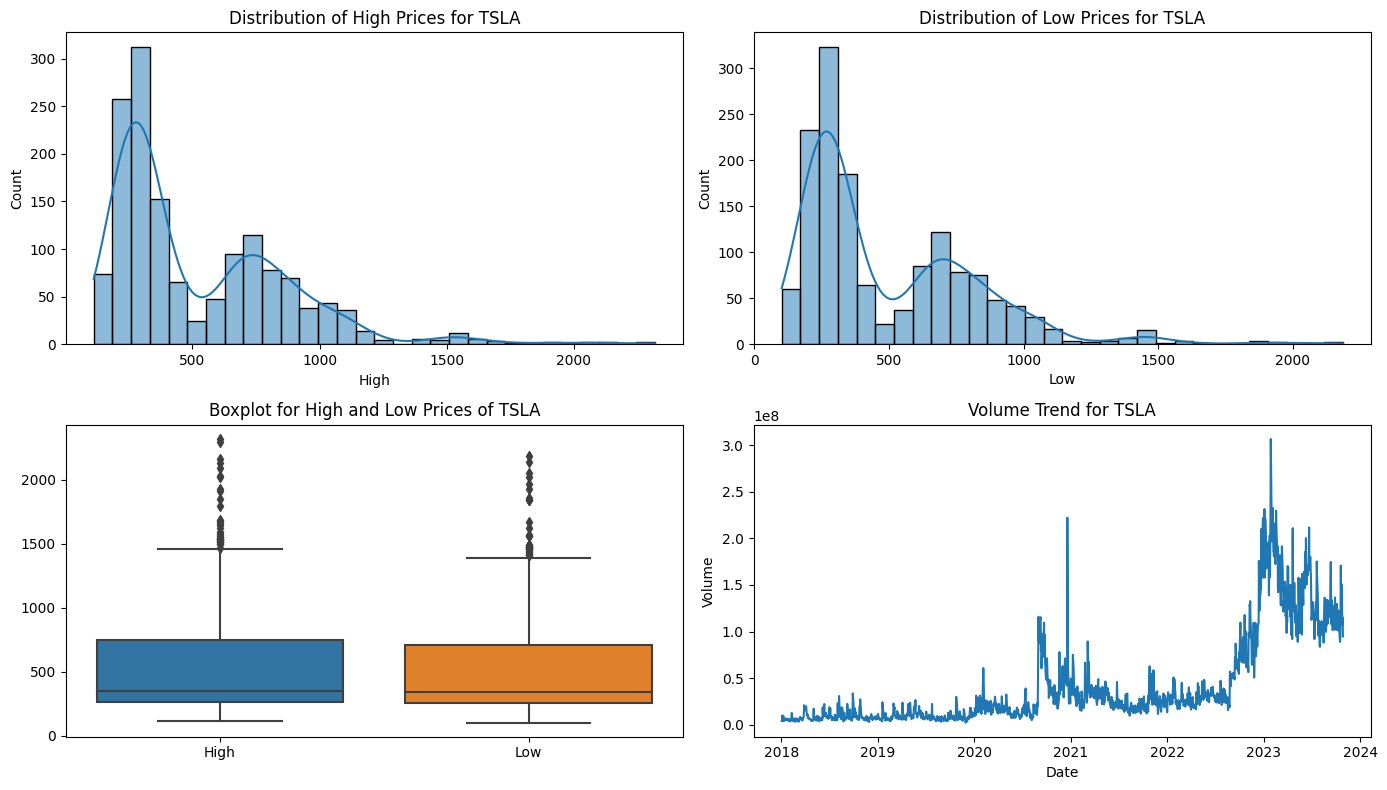

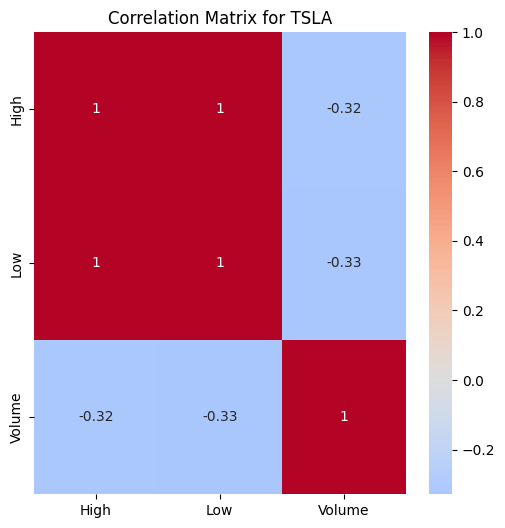

In [ ]:
# Perform EDA for each symbol
perform_eda(tsla_data, 'TSLA')


Preview of data for AMD:
            Date Symbol     Open      High     Low    Close    Volume
9394  2023-10-27    AMD   95.800   97.3500  94.590   96.430  52458653
9395  2023-10-26    AMD   95.990   97.5200  93.115   93.670  49896360
9396  2023-10-25    AMD  100.420  101.0300  95.230   96.055  53424477
9397  2023-10-24    AMD  100.970  101.7899  99.380  101.670  51982918
9398  2023-10-23    AMD  100.812  102.4200  99.315  100.010  50817440

Summary statistics for AMD:
              Open         High          Low        Close        Volume
count  1466.000000  1466.000000  1466.000000  1466.000000  1.466000e+03
mean     66.286124    67.648209    64.871053    66.277766  6.971680e+07
std      37.004881    37.744261    36.174494    36.953748  3.389496e+07
min       9.080000     9.770000     9.040000     9.530000  1.670591e+07
25%      29.942500    30.507500    29.310000    29.785000  4.595819e+07
50%      74.385000    75.734950    72.796550    74.700000  5.992612e+07
75%      94.057500   

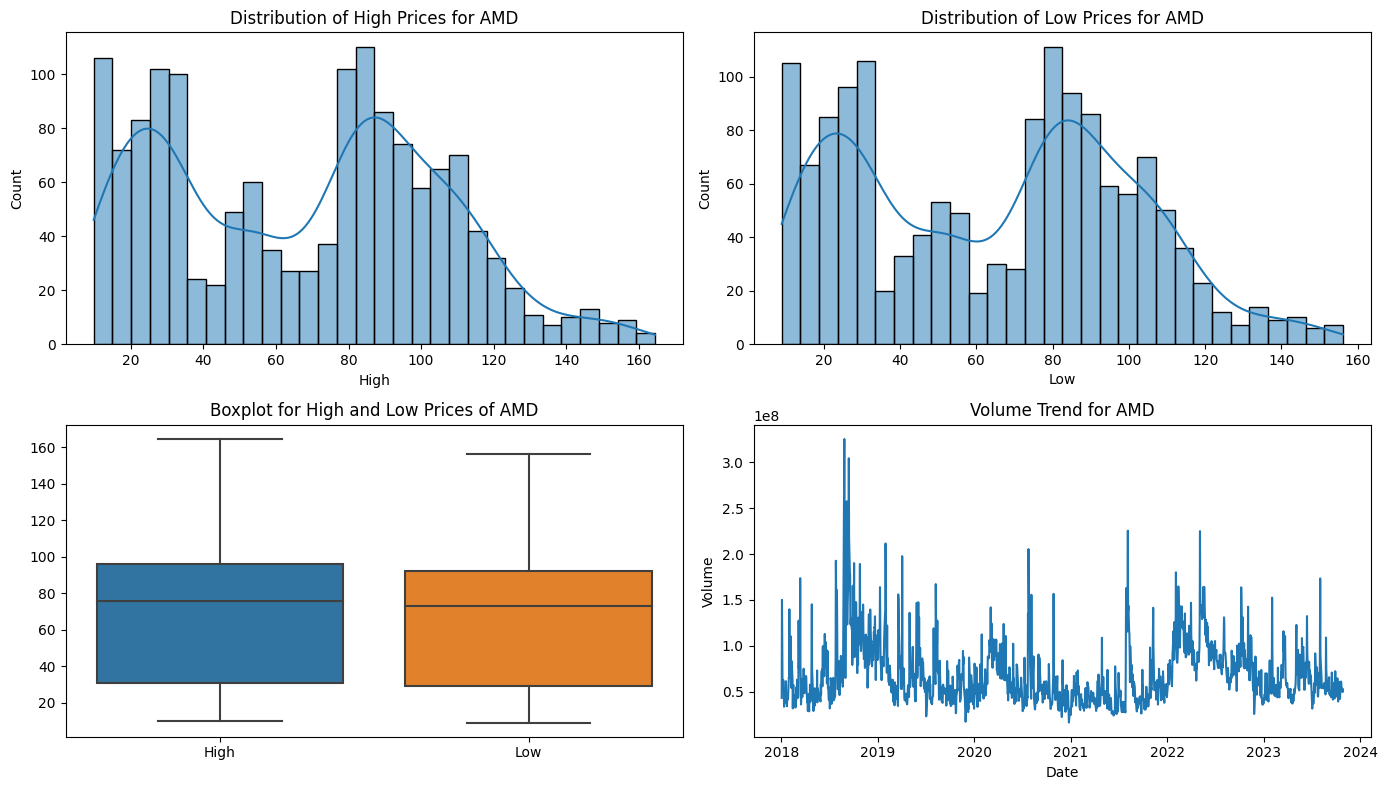

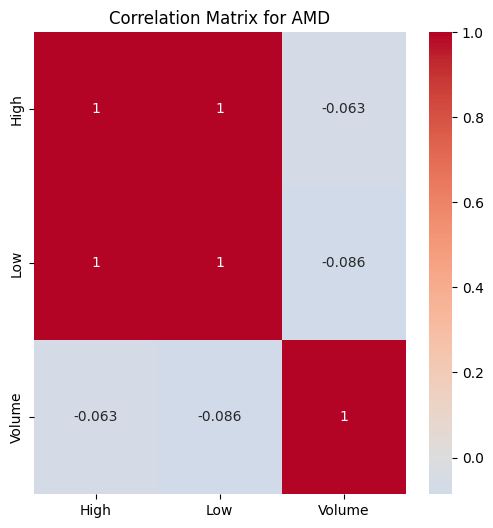

In [ ]:
perform_eda(amd_data, 'AMD')


Preview of data for NVDA:
             Date Symbol    Open      High       Low   Close    Volume
15431  2023-10-27   NVDA  411.30  412.0600  400.1500  405.00  41678441
15432  2023-10-26   NVDA  418.53  422.5555  398.8019  403.26  54100132
15433  2023-10-25   NVDA  433.98  436.5000  415.5500  417.79  39837922
15434  2023-10-24   NVDA  430.77  436.9700  426.9100  436.63  40146337
15435  2023-10-23   NVDA  412.29  432.4799  409.4500  429.75  47853049

Summary statistics for NVDA:
              Open         High          Low        Close        Volume
count  1466.000000  1466.000000  1466.000000  1466.000000  1.466000e+03
mean    294.100795   299.272459   288.684816   294.179659  2.616959e+07
std     148.940230   150.877158   146.582800   148.849567  2.137745e+07
min     109.710000   117.350000   108.130000   112.270000  2.447088e+06
25%     183.145000   187.502500   180.422500   183.992500  9.365307e+06
50%     243.615000   248.040000   239.150000   243.845000  1.630163e+07
75%     385.4

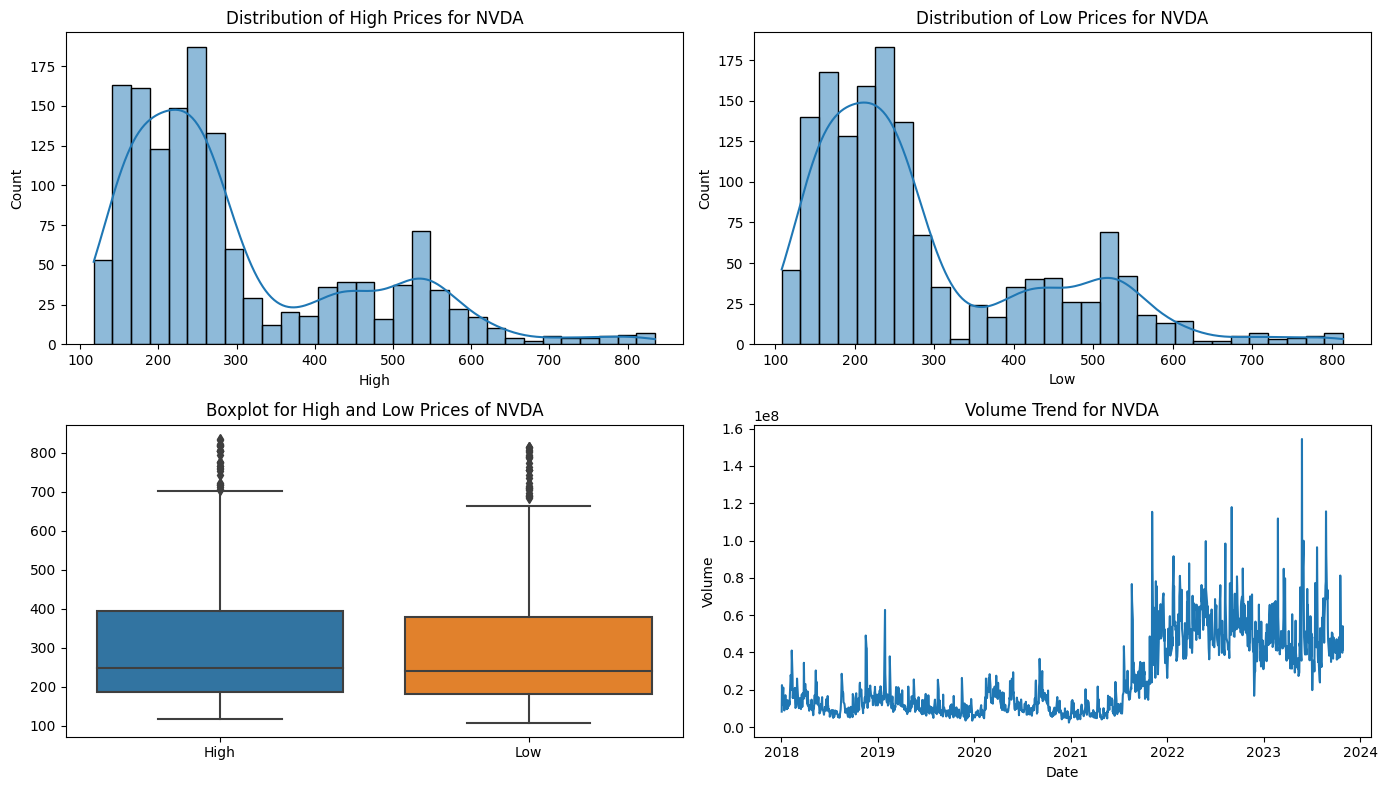

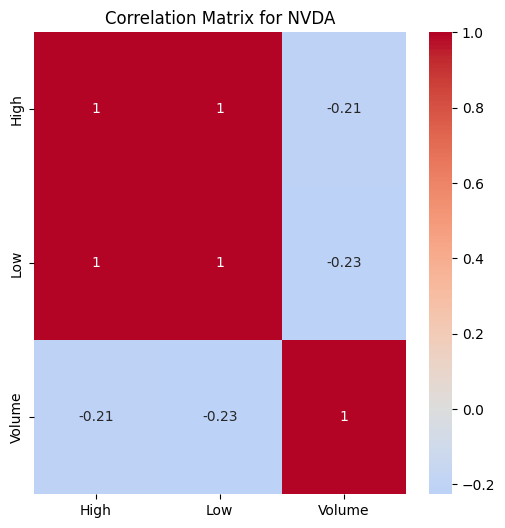

In [ ]:
perform_eda(nvda_data, 'NVDA')


Preview of data for AAPL:
         Date Symbol    Open      High     Low   Close    Volume
0  2023-10-27   AAPL  166.91  168.9600  166.83  168.22  58499129
1  2023-10-26   AAPL  170.37  171.3775  165.67  166.89  70625258
2  2023-10-25   AAPL  171.88  173.0600  170.65  171.10  57156962
3  2023-10-24   AAPL  173.05  173.6700  171.45  173.44  43816644
4  2023-10-23   AAPL  170.91  174.0100  169.93  173.00  55980109

Summary statistics for AAPL:
              Open         High          Low        Close        Volume
count  1466.000000  1466.000000  1466.000000  1466.000000  1.466000e+03
mean    187.425471   189.613623   185.455445   187.646371  6.241584e+07
std      64.476404    65.335946    63.817198    64.738912  3.839810e+07
min     104.540000   110.190000   103.100000   106.840000  1.136204e+07
25%     147.128750   148.955000   145.762500   147.292500  3.158558e+07
50%     172.200000   173.930000   170.850000   172.395000  5.507978e+07
75%     201.915000   204.330000   200.607500   20

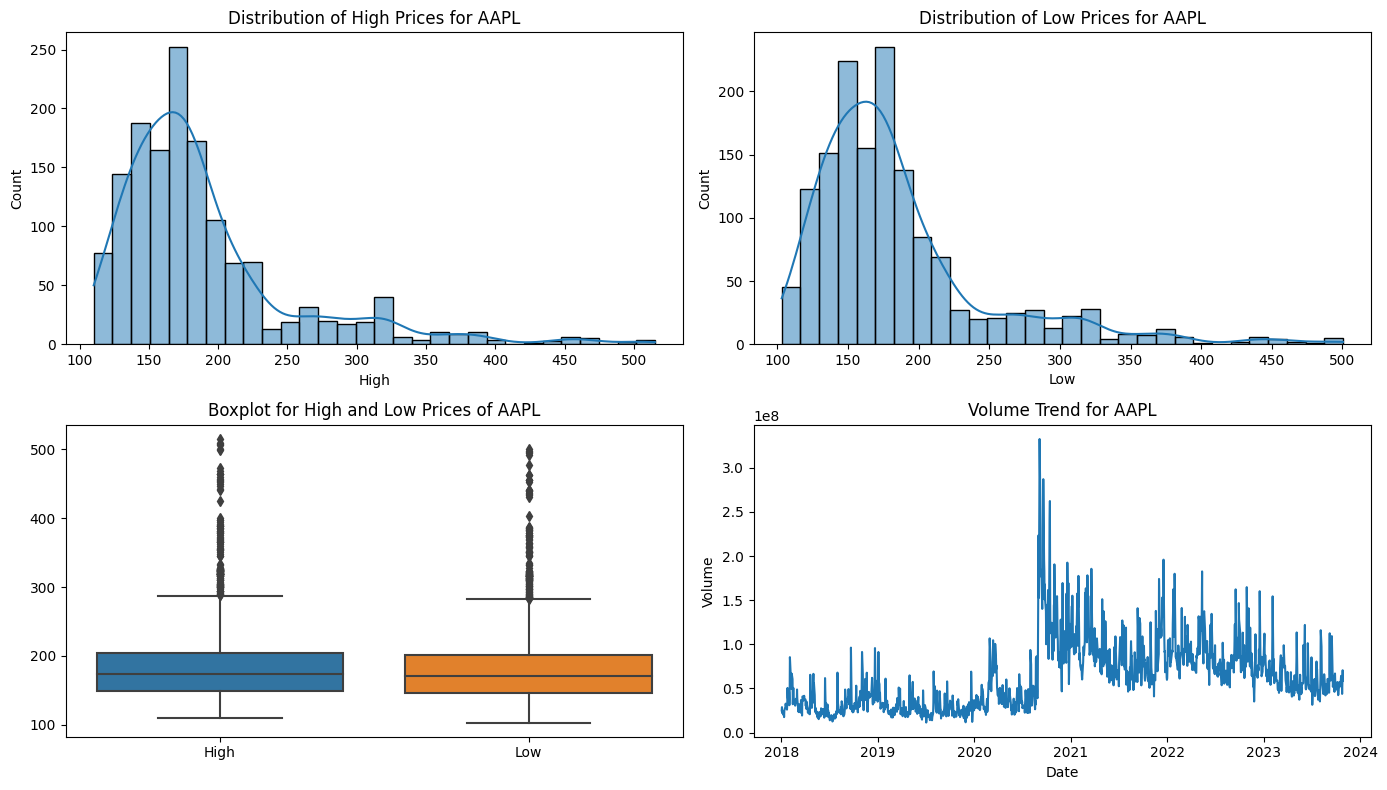

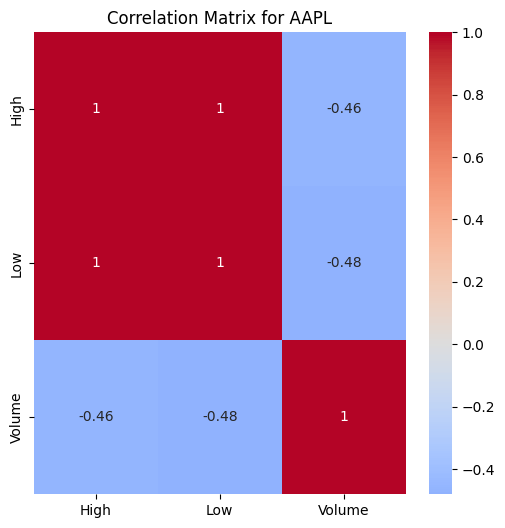

In [ ]:
perform_eda(appl_data, 'AAPL')

In [ ]:
# Calculating a 3-day simple moving average (SMA)
df_filtered['SMA_3'] = df_filtered['Close'].rolling(window=3).mean()

<ipython-input-18-6dae4d449424>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SMA_3'] = df_filtered['Close'].rolling(window=3).mean()


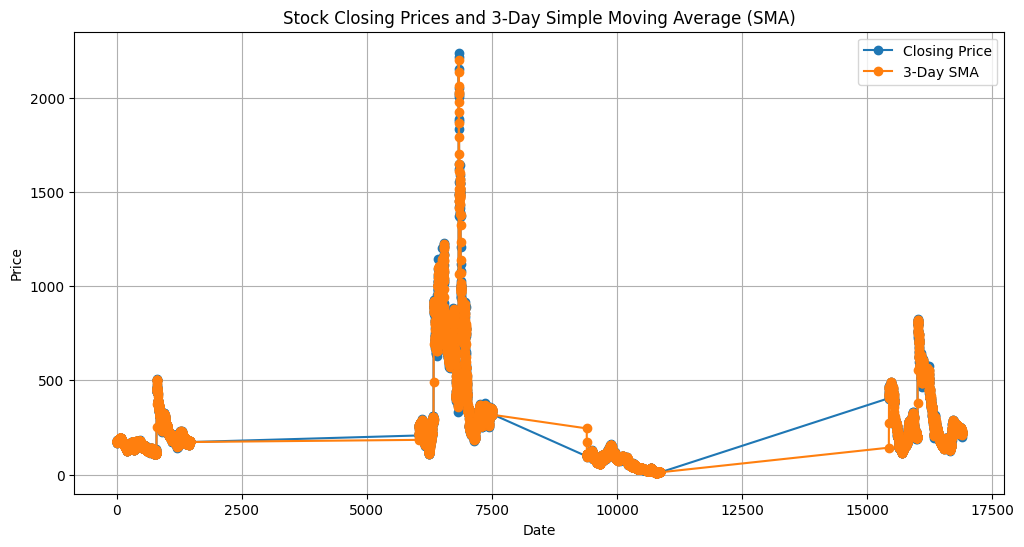

In [ ]:
# Plotting the closing prices and moving averages
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Close'], label='Closing Price', marker='o')
plt.plot(df_filtered.index, df_filtered['SMA_3'], label='3-Day SMA', marker='o')
# Adding title and labels
plt.title('Stock Closing Prices and 3-Day Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

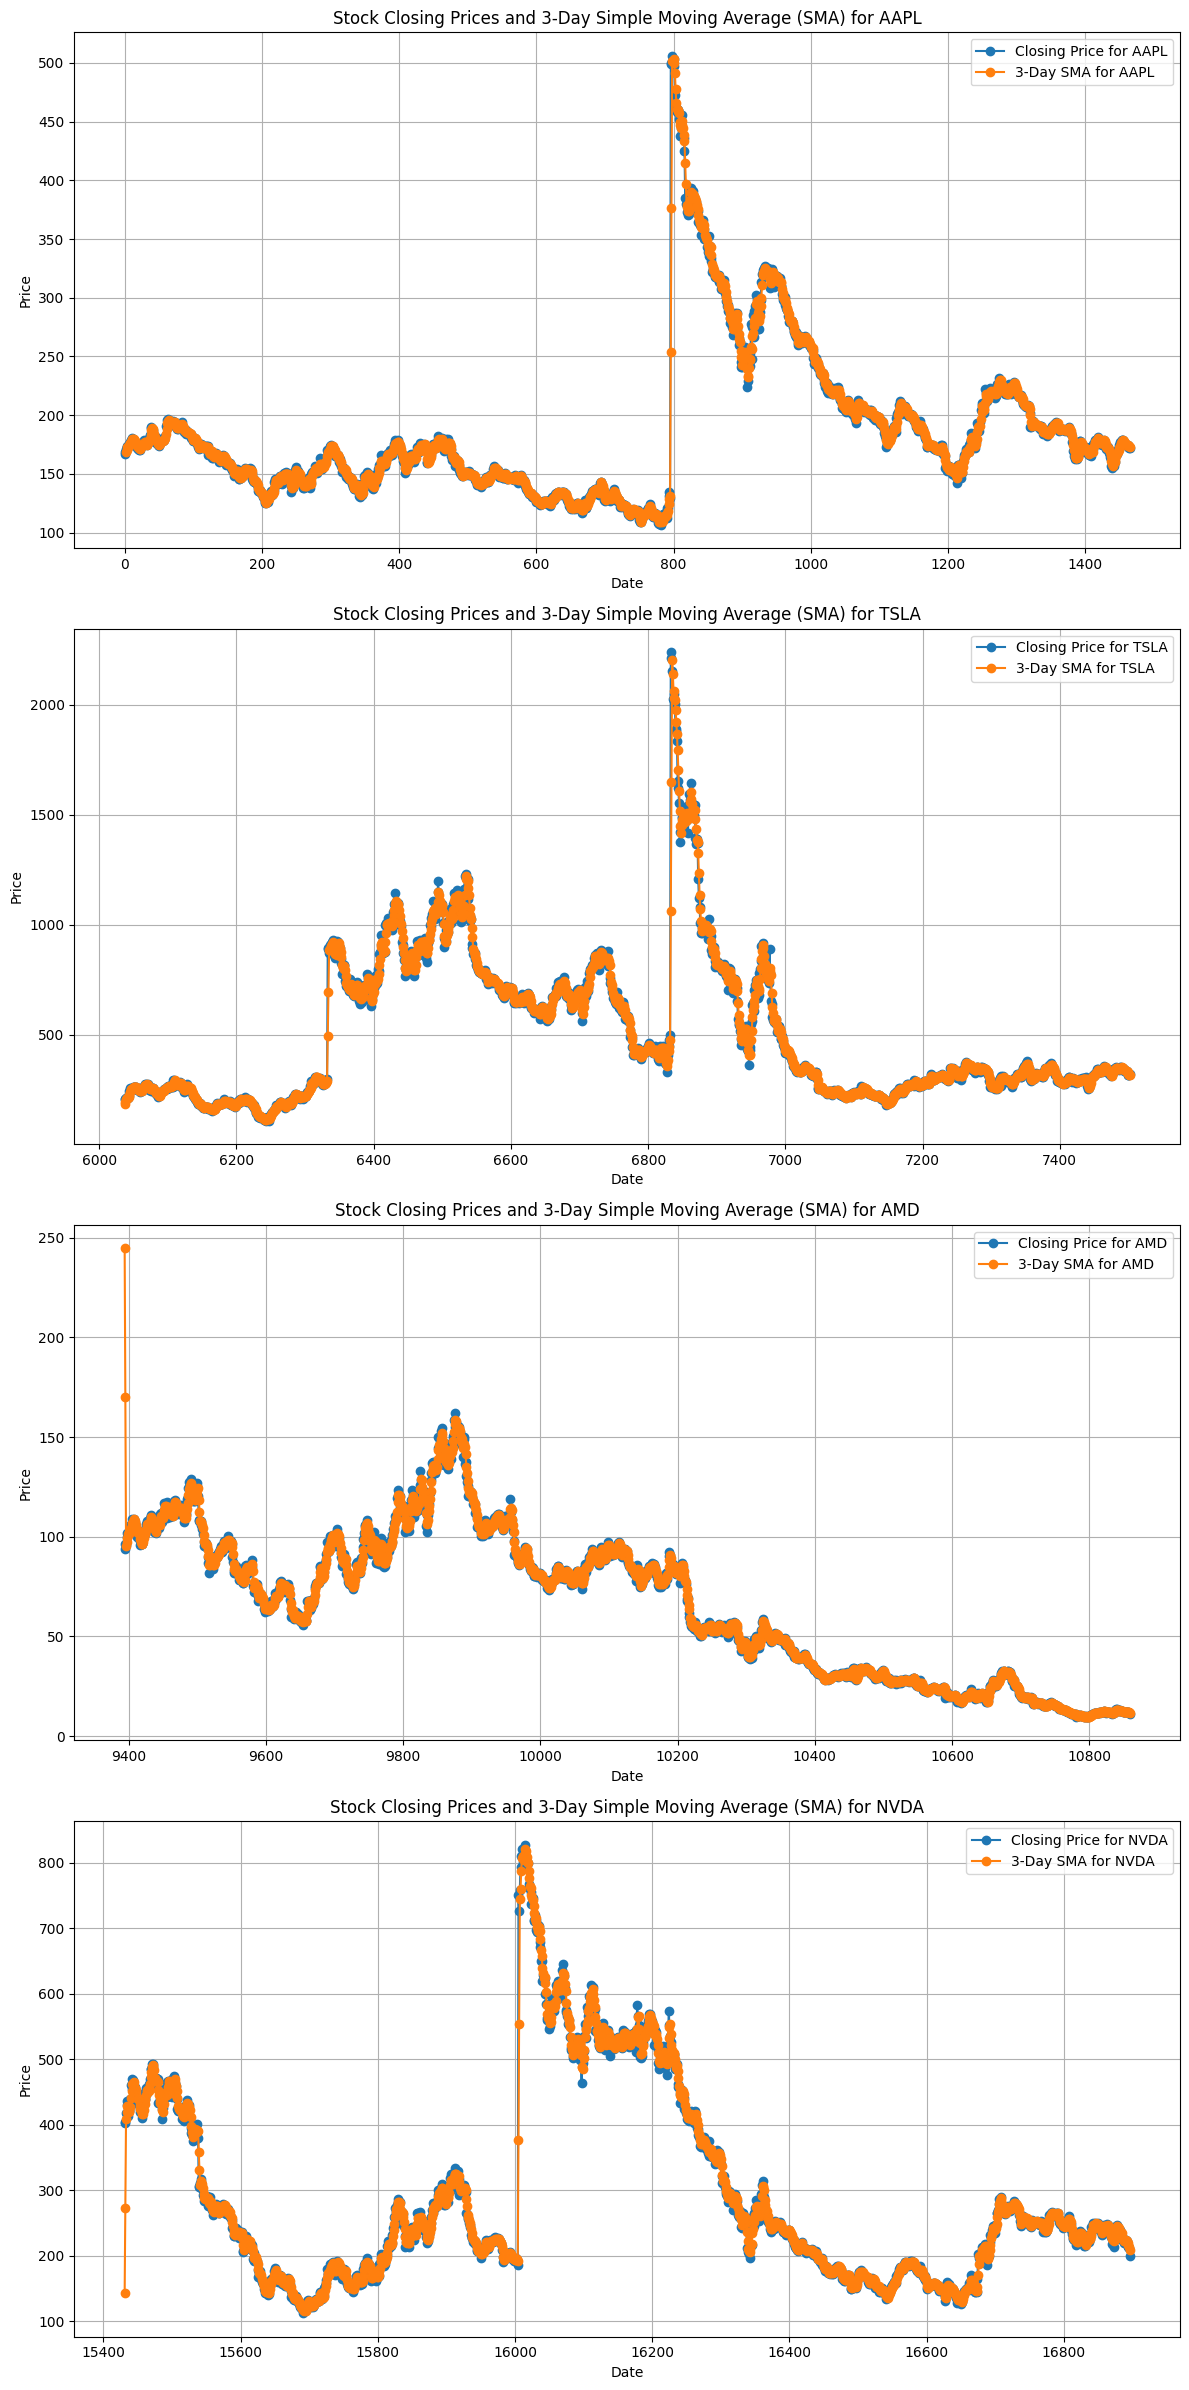

In [ ]:
symbols = df_filtered['Symbol'].unique()
num_symbols = len(symbols)
fig, axs = plt.subplots(num_symbols, 1, figsize=(12, 6*num_symbols))

for i, symbol in enumerate(symbols):
    symbol_data = df_filtered[df_filtered['Symbol'] == symbol]
    ax = axs[i] if num_symbols > 1 else axs

    ax.plot(symbol_data.index, symbol_data['Close'], label=f'Closing Price for {symbol}', marker='o')
    ax.plot(symbol_data.index, symbol_data['SMA_3'], label=f'3-Day SMA for {symbol}', marker='o')

    ax.set_title(f'Stock Closing Prices and 3-Day Simple Moving Average (SMA) for {symbol}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

Model Building


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
X = df_filtered[['Open', 'Close', 'Volume', 'High', 'Low']]
y = df_filtered['Close']

In [ ]:
# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Support Vector Machine (SVM) model
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

In [ ]:
# Print shapes for debugging
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4691, 5)
X_test shape: (1173, 5)


In [ ]:
# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=1)


Epoch 1/10
4691/4691 [==============================] - 29s 5ms/step - loss: 94087.0312
Epoch 2/10
4691/4691 [==============================] - 24s 5ms/step - loss: 60084.1172
Epoch 3/10
4691/4691 [==============================] - 23s 5ms/step - loss: 43320.5000
Epoch 4/10
4691/4691 [==============================] - 23s 5ms/step - loss: 32717.2363
Epoch 5/10
4691/4691 [==============================] - 23s 5ms/step - loss: 25160.8848
Epoch 6/10
4691/4691 [==============================] - 23s 5ms/step - loss: 20282.1426
Epoch 7/10
4691/4691 [==============================] - 23s 5ms/step - loss: 16135.4355
Epoch 8/10
4691/4691 [==============================] - 22s 5ms/step - loss: 13183.8018
Epoch 9/10
4691/4691 [==============================] - 23s 5ms/step - loss: 11174.3281
Epoch 10/10
4691/4691 [==============================] - 22s 5ms/step - loss: 9601.6387


In [ ]:
# Make predictions
svm_predictions = svm_model.predict(X_test)

In [ ]:
lstm_predictions = lstm_model.predict(X_test)

37/37 [==============================] - 1s 3ms/step


In [ ]:
# Evaluate models
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))
print("SVM RMSE:", svm_rmse)

SVM RMSE: 232.4304470483021


In [ ]:
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
print("LSTM RMSE:", lstm_rmse)

LSTM RMSE: 87.7516591830353


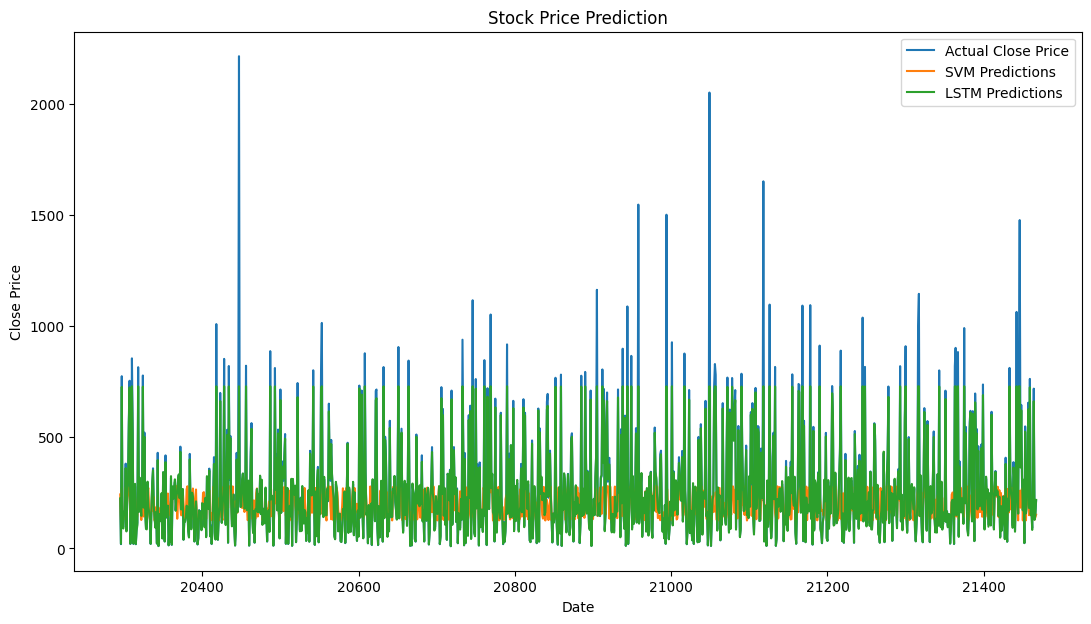

In [ ]:
# Visualize predictions
plt.figure(figsize=(13, 7))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Close Price')
plt.plot(df.index[-len(y_test):], svm_predictions, label='SVM Predictions')
plt.plot(df.index[-len(y_test):], lstm_predictions, label='LSTM Predictions')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
# LSTM model
lstm_model_p = Sequential()
lstm_model_p.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model_p.add(LSTM(units=50))
lstm_model_p.add(Dense(units=1))
lstm_model_p.compile(optimizer='adam', loss='mean_squared_error')
lstm_model_p.fit(X_train, y_train, epochs=100, batch_size=8)


Epoch 1/100
587/587 [==============================] - 9s 7ms/step - loss: 120367.9688
Epoch 2/100
587/587 [==============================] - 4s 7ms/step - loss: 107273.2188
Epoch 3/100
587/587 [==============================] - 6s 10ms/step - loss: 96772.2500
Epoch 4/100
587/587 [==============================] - 4s 7ms/step - loss: 87867.1328
Epoch 5/100
587/587 [==============================] - 4s 7ms/step - loss: 80203.0391
Epoch 6/100
587/587 [==============================] - 5s 9ms/step - loss: 73556.8828
Epoch 7/100
587/587 [==============================] - 4s 7ms/step - loss: 67736.7969
Epoch 8/100
587/587 [==============================] - 4s 7ms/step - loss: 62590.4727
Epoch 9/100
587/587 [==============================] - 5s 8ms/step - loss: 57988.7617
Epoch 10/100
587/587 [==============================] - 5s 8ms/step - loss: 53837.8594
Epoch 11/100
587/587 [==============================] - 4s 7ms/step - loss: 50062.5352
Epoch 12/100
587/587 [===========================

In [ ]:
lstm_predictions_hyperP = lstm_model_p.predict(X_test)

37/37 [==============================] - 1s 3ms/step


In [ ]:

lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions_hyperP))
lstm_mae = mean_absolute_error(y_test, lstm_predictions_hyperP)
lstm_mse = mean_squared_error(y_test, lstm_predictions_hyperP)

print("LSTM RMSE:", lstm_rmse)
print("LSTM MAE:", lstm_mae)
print("LSTM MSE:", lstm_mse)

LSTM RMSE: 44.86989543601276
LSTM MAE: 7.4400835741958575
LSTM MSE: 2013.307516438719


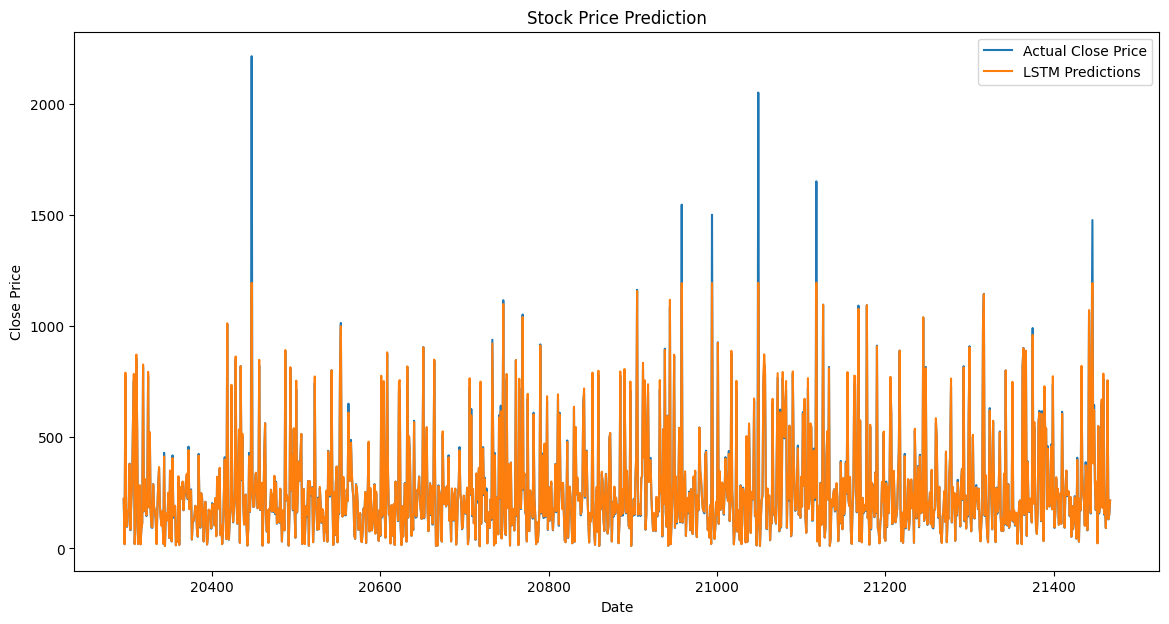

In [ ]:
# Visualize predictions (assuming you've already loaded the data and sorted it by date)
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Close Price')
plt.plot(df.index[-len(y_test):], lstm_predictions_hyperP, label='LSTM Predictions')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()